In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Hamilton formalism and Harmonic oscillator

$$ H(q,p) = \frac12 p^2 + \frac12 q^2 $$

The Hamilton equations:
$$\dot q = \frac{\partial H}{\partial p}$$
$$\dot p = -\frac{\partial H}{\partial q}$$

Inserting the expression of H:

\begin{align}
    \dot q = p \\ \dot p = -q
\end{align}

This gives the general solution:
\begin{align}
    q(t) &= A\cdot\sin(t) + B\cdot\cos(t)\\
    p(t) &= A\cdot\cos(t) - B\cdot\sin(t)
\end{align}

Then the total energy is
$$
    E = \frac12 (A^2 + B^2)
$$

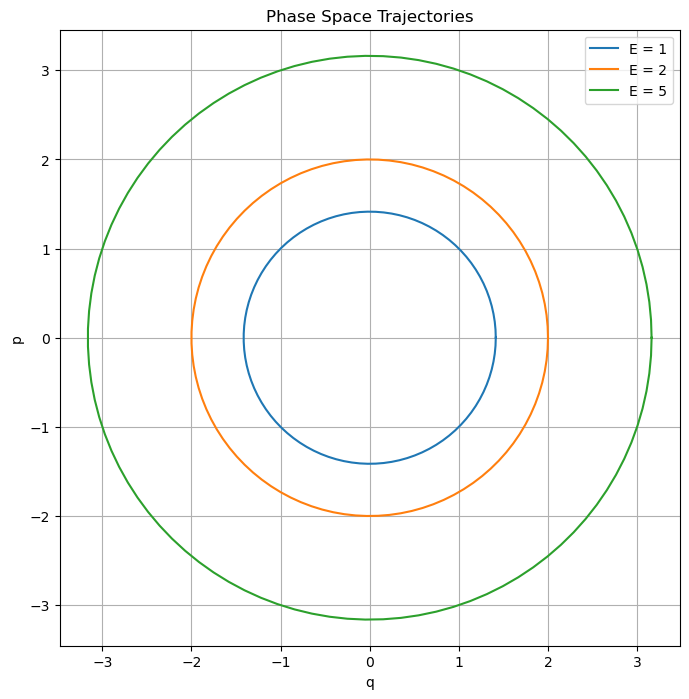

In [16]:
E = [1,2,5]

def plot_single_trajectory(E, *pyplotargs, **pyplotkwargs):
    A = np.sqrt(2*E)
    t = np.linspace(0, 2*np.pi, 100)
    q = A * np.cos(t)
    p = A * np.sin(t)
    plt.plot(q, p, *pyplotargs, **pyplotkwargs)

def plot_phase_space_trajectories(E):
    fig, ax = plt.subplots(figsize=(8, 8))
    for e in E:
        A = np.sqrt(2*e)
        t = np.linspace(0, 2*np.pi, 100)
        q = A * np.cos(t)
        p = A * np.sin(t)
        ax.plot(q, p, label=f'E = {e}')
    ax.set_xlabel('q')
    ax.set_ylabel('p')
    ax.set_title('Phase Space Trajectories')
    ax.legend()
    plt.grid()
    plt.axis('equal')

    plt.show()

plot_phase_space_trajectories(E)

$$
\frac\partial{\partial t} \begin{pmatrix}q(t)\\p(t)\end{pmatrix} = \mathscr{O}\begin{pmatrix}q(t)\\p(t)\end{pmatrix}
$$

It is easy to see that 
$$
    \mathscr O = \begin{pmatrix} 0 & 1 \\ -1 & 0\end{pmatrix}
$$

We will implement the steps for Euler, implicit Euler, Leapfrog:
\begin{align}
    u^{(n+1)} &= u^{(n)} + \Delta t (\mathscr O u)^{(n)} \\
    u^{(n+1)} &= u^{(n)} + \Delta t (\mathscr O u)^{(n+1)} \\
    u^{(n+1)} &= u^{(n-1)} + 2\cdot \Delta t (\mathscr O u)^{(n)}
\end{align}

In [3]:
# Choose the parameters here:

u0 = np.array([1.0, 0.0])  # Initial state vector
dt = 0.01  # Time step
steps = 20000 # Number of simulation steps
Temperature = 1.0
N_randomize = 100 # number of steps between randomizations

In [4]:
# Define differential operator:
O = np.array([[0, 1], [-1, 0]])

def apply_operator(O, u):
    """Apply the differential operator O to the state vector."""
    return O @ u

def euler_step(u, dt):
    """Perform one Euler step."""
    return u + apply_operator(O, u) * dt

def implicit_euler_step(u, dt):
    """Perform one implicit Euler step."""
    I = np.eye(2)
    return np.linalg.solve(I - O * dt, u)

def leapfrog_step(uminus, u, dt):
    """Perform one leapfrog step."""
    uplus = uminus + 2 * apply_operator(O, u) * dt
    return uplus

def euler_simulation(u0, dt, steps):
    if u0.shape != (2,):
        raise ValueError("Initial state u0 must be a 2D vector.")
    """Simulate using the Euler method."""
    u = u0
    trajectory = np.empty((steps, 2))
    trajectory[0] = u0
    for i in range(1, steps):
        u = euler_step(u, dt)
        trajectory[i] = u
    return trajectory

def implicit_euler_simulation(u0, dt, steps):
    if u0.shape != (2,):
        raise ValueError("Initial state u0 must be a 2D vector.")
    """Simulate using the implicit Euler method."""
    u = u0
    trajectory = np.empty((steps, 2))
    trajectory[0] = u0
    for i in range(1, steps):
        u = implicit_euler_step(u, dt)
        trajectory[i] = u
    return trajectory

def leapfrog_simulation(u0, dt, steps):
    """Simulate using the leapfrog method."""
    if u0.shape != (2,):
        raise ValueError("Initial state u0 must be a 2D vector.")
    u = u0
    uminus = u0 - apply_operator(O, u) * dt  # Initial backward step
    trajectory = np.empty((steps, 2))
    trajectory[0] = u0
    for i in range(1, steps):
        u = leapfrog_step(uminus, u, dt)
        trajectory[i] = u.copy()
        uminus = u.copy()  # Update for next step
    return trajectory

In [5]:
def compute_instantaneous_energy(u):
    """Compute the instantaneous energy of the trajectory."""
    if u.shape!= (2,):
        raise ValueError("Input u must be a 2D array with shape (2,).")
    return 0.5 * np.sum(u**2)

def plot_energy(trajectory, dt, method):
    """Plot the energy of the trajectory over time."""
    energies = np.array([compute_instantaneous_energy(u) for u in trajectory])
    times = np.arange(len(energies)) * dt
    plt.plot(times, energies, label=method, alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Energy')

In [6]:
# Run simulations
euler_trajectory = euler_simulation(u0, dt, steps)
implicit_euler_trajectory = implicit_euler_simulation(u0, dt, steps)
leapfrog_trajectory = leapfrog_simulation(u0, dt, steps)

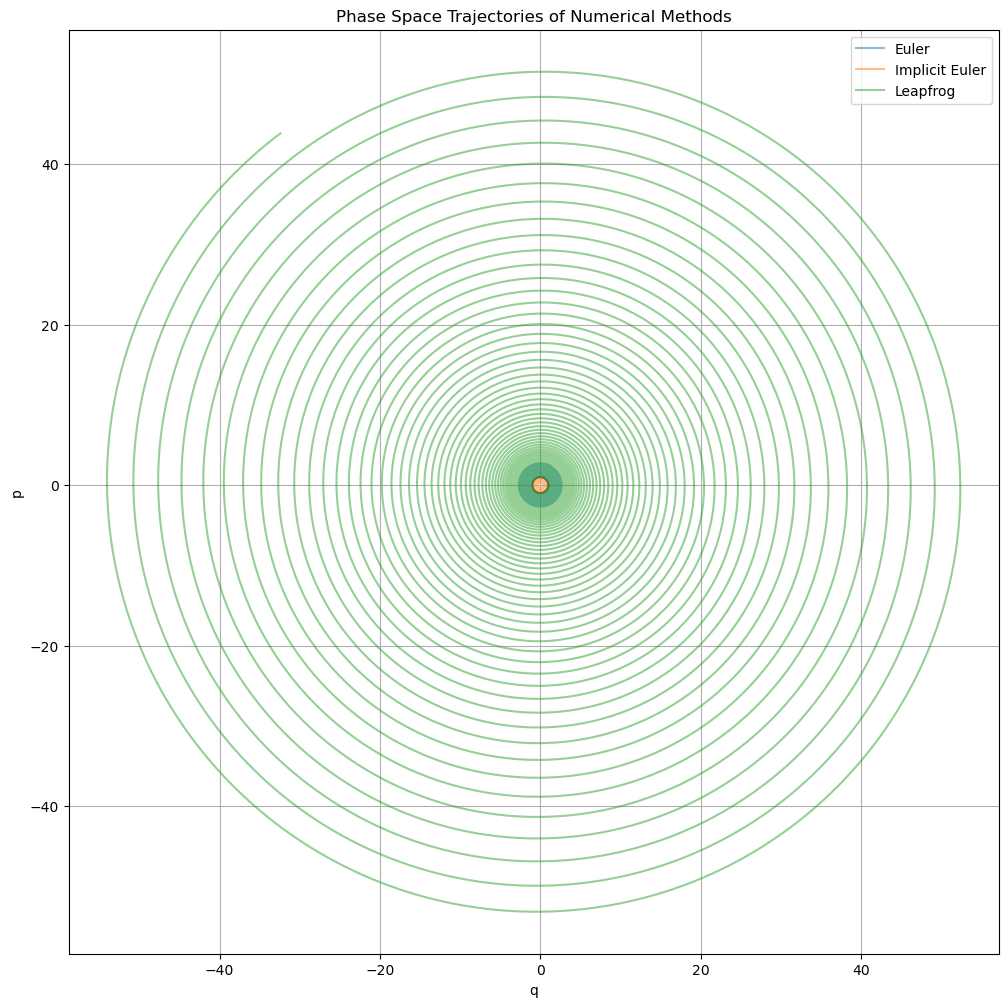

In [7]:
# Plot trajectories

plt.figure(figsize=(12, 12))

plot_single_trajectory(compute_instantaneous_energy(u0), 'k')

plt.plot(euler_trajectory[:, 0], euler_trajectory[:, 1], label='Euler', alpha=0.5)
plt.plot(implicit_euler_trajectory[:, 0], implicit_euler_trajectory[:, 1], label='Implicit Euler', alpha=0.5)
plt.plot(leapfrog_trajectory[:, 0], leapfrog_trajectory[:, 1], label='Leapfrog', alpha=0.5)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Phase Space Trajectories of Numerical Methods')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

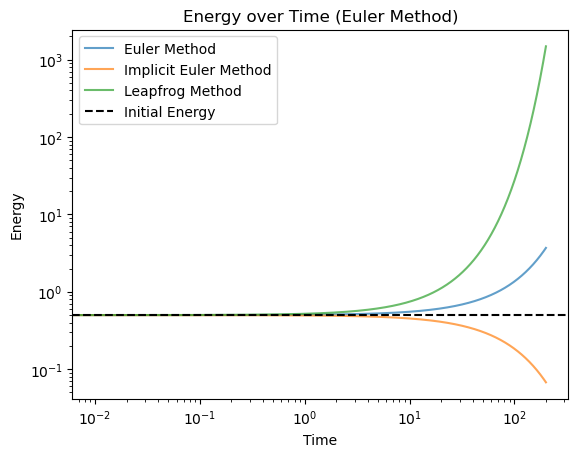

In [8]:
# Plot energy for each method
plt.loglog(figsize=(10, 6))
plot_energy(euler_trajectory, dt, 'Euler Method')
plot_energy(implicit_euler_trajectory, dt, 'Implicit Euler Method')
plot_energy(leapfrog_trajectory, dt, 'Leapfrog Method')
plt.axhline(y=compute_instantaneous_energy(u0), color='k', linestyle='--', label='Initial Energy')
plt.legend()
plt.title('Energy over Time (Euler Method)')
plt.show()

Now we implement the velocity Verlet
\begin{align}
    q(t+\Delta t) &= q(t) + v(t)\Delta t + \frac{F(t)}{2}\Delta t^2\\
    v(t+\Delta t) &= v(t) + \frac{F(t) + F(t + \Delta t)}{2} \Delta t
\end{align}

We can use that $$F(t) = \frac{\partial p}{\partial t} = -q(t)$$.

When discretizing:
$$ F(t) = -q^{(n)} $$
$$ F(t + \Delta t) = -q^{(n+1)}

In [9]:
def velocity_verlet_step(u, dt):
    """Perform one step of the velocity Verlet method."""
    q, v, = u
    # Update position
    qnew = q + v * dt - 0.5 * q * dt**2
    # Update velocity
    vnew = v - 0.5 * (q + qnew) * dt
    return np.array([qnew, vnew])

def velocity_verlet_simulation(u0, dt, steps):
    """Simulate using the velocity Verlet method."""
    if u0.shape != (2,):
        raise ValueError("Initial state u0 must be a 2D vector.")
    u = u0.copy()
    trajectory = np.empty((steps, 2))
    trajectory[0] = u0
    for i in range(1, steps):
        u = velocity_verlet_step(u, dt)
        trajectory[i] = u
    return trajectory


In [10]:
verlet_trajectory = velocity_verlet_simulation(u0, dt, steps)

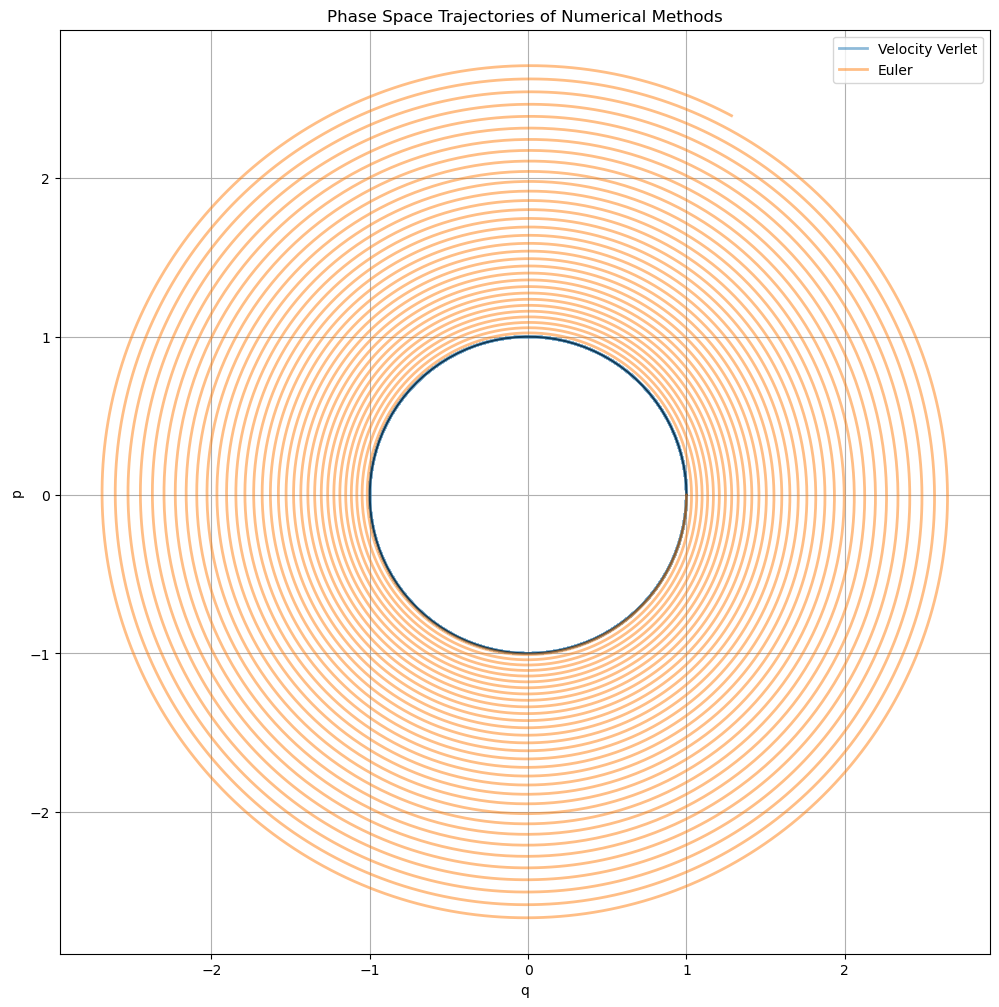

In [11]:
# Plot trajectories

plt.figure(figsize=(12, 12))

plot_single_trajectory(compute_instantaneous_energy(u0), 'k')

plt.plot(verlet_trajectory[:, 0], verlet_trajectory[:, 1], linewidth = 2, label='Velocity Verlet', alpha=0.5)
plt.plot(euler_trajectory[:, 0], euler_trajectory[:, 1], linewidth = 2, label='Euler', alpha=0.5)
#plt.plot(implicit_euler_trajectory[:, 0], implicit_euler_trajectory[:, 1], label='Implicit Euler', alpha=0.5)
#plt.plot(leapfrog_trajectory[:, 0], leapfrog_trajectory[:, 1], label='Leapfrog', alpha=0.5)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Phase Space Trajectories of Numerical Methods')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

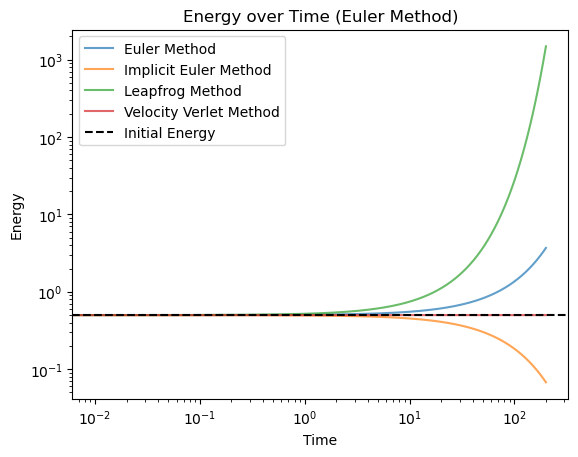

In [12]:
# Plot energy for each method
plt.loglog(figsize=(10, 6))
plot_energy(euler_trajectory, dt, 'Euler Method')
plot_energy(implicit_euler_trajectory, dt, 'Implicit Euler Method')
plot_energy(leapfrog_trajectory, dt, 'Leapfrog Method')
plot_energy(verlet_trajectory, dt, 'Velocity Verlet Method')
plt.axhline(y=compute_instantaneous_energy(u0), color='k', linestyle='--', label='Initial Energy')
plt.legend()
plt.title('Energy over Time (Euler Method)')
plt.show()

In [32]:
def draw_from_MWB(T):
    '''Draw velocity from Maxwell-Boltzmann distribution at temperature T.'''
    if T < 0:
        raise ValueError("Temperature T must be non-negative")
    # Draw from a normal distribution with mean 0 and standard deviation sqrt(T)
    v = np.random.normal(0, np.sqrt(T))
    return v

def randomize_velocity(u, T):
    u[1] = draw_from_MWB(T)
    return u

def modified_verlet_simulation(u0, dt, steps, T, N_randomize = 10):
    """Simulate using the modified velocity Verlet method with randomization."""
    if u0.shape != (2,):
        raise ValueError("Initial state u0 must be a 2D vector.")
    u = u0.copy()
    trajectory = np.empty((steps, 2))
    trajectory[0] = u0
    for i in range(1, steps):
        if i % N_randomize == 0:
            u = randomize_velocity(u, T)
        u = velocity_verlet_step(u, dt)
        trajectory[i] = u
    return trajectory

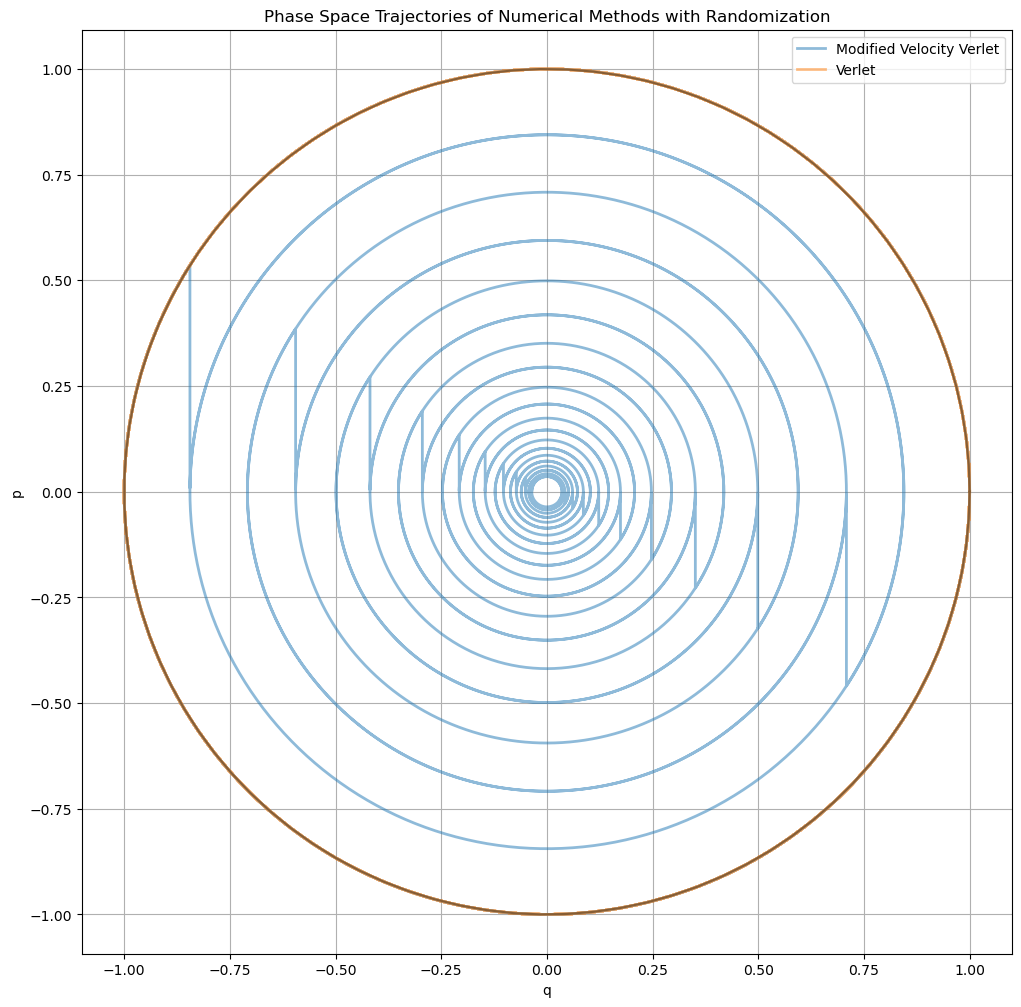

In [39]:
T = Temperature  # Temperature for randomization
N_randomize = N_randomize  # Number of steps between randomizations

T = 0.0
N_randomize = 1000

modified_verlet_trajectory = modified_verlet_simulation(u0, dt, steps, T=T, N_randomize=N_randomize)

# Plot trajectories
plt.figure(figsize=(12, 12))
plot_single_trajectory(compute_instantaneous_energy(u0), 'k')
plt.plot(modified_verlet_trajectory[:, 0], modified_verlet_trajectory[:, 1], linewidth=2, label='Modified Velocity Verlet', alpha=0.5)
plt.plot(verlet_trajectory[:, 0], verlet_trajectory[:, 1], linewidth=2, label='Verlet', alpha=0.5)
plt.xlabel('q')
plt.ylabel('p')
plt.title('Phase Space Trajectories of Numerical Methods with Randomization')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

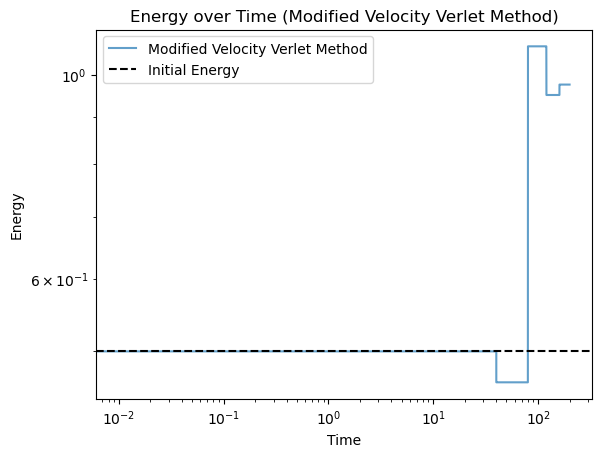

In [23]:
plt.loglog(figsize=(10, 6))
plot_energy(modified_verlet_trajectory, dt, 'Modified Velocity Verlet Method')
plt.axhline(y=compute_instantaneous_energy(u0), color='k', linestyle='--', label='Initial Energy')
plt.legend()
plt.title('Energy over Time (Modified Velocity Verlet Method)')
plt.show()

In [48]:
from matplotlib import animation
from IPython.display import HTML
%matplotlib notebook


def animate_trajectory(trajectory, method_name, number_of_frames=100):
    """Create an animation of the trajectory."""
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('q')
    ax.set_ylabel('p')
    ax.set_title(f'Trajectory Animation: {method_name}')
    
    line, = ax.plot([], [], lw=2)
    
    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        q = trajectory[:frame, 0]
        p = trajectory[:frame, 1]
        line.set_data(q, p)
        return line,

    ani = animation.FuncAnimation(fig, update, frames=number_of_frames, init_func=init, blit=True)
    # ani.save(f'trajectory_{method_name}.gif', writer='imagemagick', fps=30)
    #plt.close(fig)  # Close the figure to avoid displaying it in Jupyter Notebook

    HTML(ani.to_jshtml())
    print("Done with animation.")
    
# Animate the trajectories
animate_trajectory(modified_verlet_trajectory, 'Modified Velocity Verlet', number_of_frames=200)


<IPython.core.display.Javascript object>

Done with animation.
